In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

from sklearn import datasets
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
# Any results you write to the current directory are saved as output.

In [73]:
# import some data to play with
iris = datasets.load_iris()

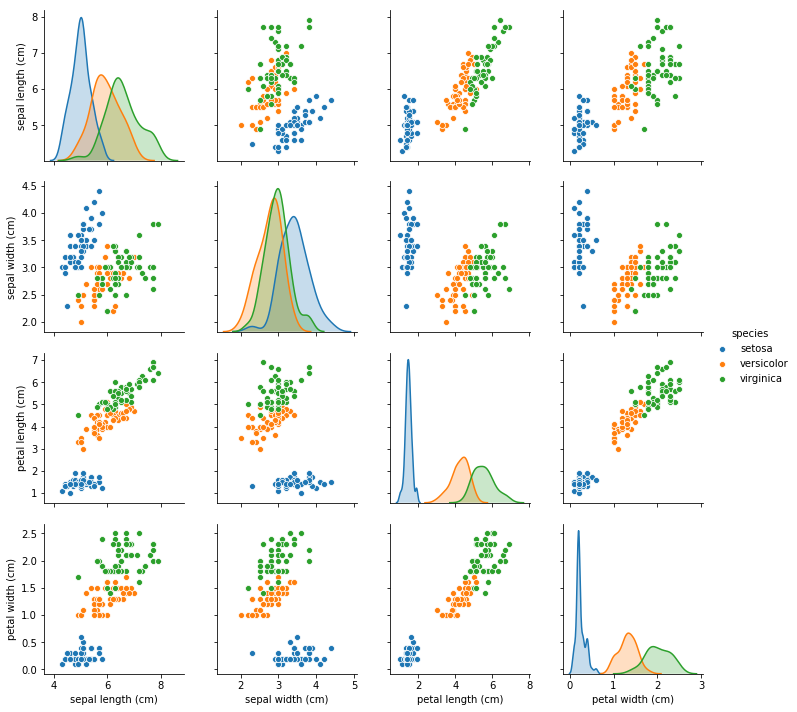

In [74]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df["species"] =iris.target_names[iris.target]
sns.pairplot(iris_df,hue="species")

K_max = 10
plt.show()

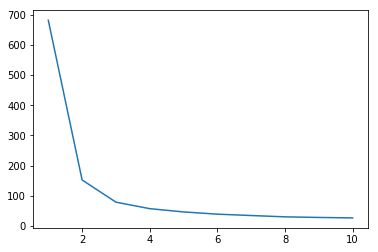

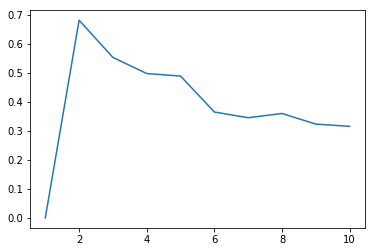

In [75]:
a = []
b = []
for k in range(1,K_max+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris.data)
    a.append(kmeans.inertia_)
    if k== 1:
        b.append(0)
    else:
        b.append(silhouette_score(iris.data, kmeans.labels_, metric='euclidean'))
    
plt.plot(range(1,K_max+1),a)
plt.show()
plt.plot(range(1,K_max+1),b)
plt.show()

Implémentation d'un critere de sélection

critere d'inertie

In [90]:
def calcInertia(X, K_max):
    '''
        renvoie les valeurs d'inertie et le k optimal.
        Le K optimal correspond au K pour lequel il ya le plus grand saut d'inertie.
    '''
    valAct = 0
    dist = 0
    K_opt = 2
    a = []
    for k in range(1,K_max+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(iris.data)
        if k>1 and dist < - kmeans.inertia_ + valAct:
            K_opt = k
            dist = -kmeans.inertia_ + valAct
        valAct = kmeans.inertia_
        a.append(valAct)
    return a, K_opt

critere silhouette

In [78]:
def calcSilhouette(X, K_max):
    '''
        renvoie les valeurs silhouette et le k qui maximise le critère
    '''
    maxF = 0
    K_opt = 1
    a = []
    a.append(0)
    for k in range(2,K_max+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(iris.data)
        val = silhouette_score(iris.data, kmeans.labels_, metric='euclidean')
        if maxF < val:
            K_opt = k
            maxF = val
        a.append(val)
        
    return a, K_opt

In [79]:
#calcul des alphas
def calcAlphas(p):
    alphas = np.zeros(K_max - 1)
    if p==1:
        return undefined
    else:
        alphas[0] = 1 - 3/(4*p)
        for k in range(1, K_max - 1):
            alphas[k] = alphas[k-1] + (1 - alphas[k-1])/6
        return alphas
        

In [80]:
def calculFonction(X, K_max):
    alphas = calcAlphas(X.shape[1])
    Iw = np.array([KMeans(n_clusters=k).fit(X).inertia_ for k in range(1, K_max + 1)])
    vectF = []
    minF = 1.0
    K_opt = 1
    for k in range(1, K_max + 1):
        if k==1 or Iw[k-1] == 0:
            vectF.append(1)
            val = 1
        else:
            val = Iw[k-1]/(alphas[k-2]*Iw[k-2])
            vectF.append(val)
        if minF > val:
            K_opt = k
            minF = val
    return vectF, K_opt

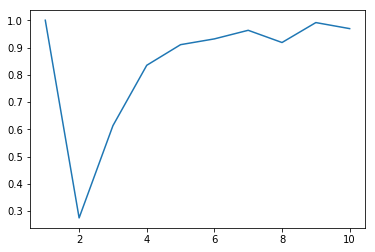

In [81]:
val, i = calculFonction(iris.data, K_max)
plt.plot(range(1,K_max + 1), val)
plt.show()

generation des données

In [82]:
m1 = np.array([5,5])
m2 = np.array([15,10])
m3 = np.array([5,15])
v= np.array([[1,0],[0,1]])

In [83]:
def generer():
    #valeurs générées
    data1 = np.random.multivariate_normal(size=50, mean=m1, cov=v )
    data2 = np.random.multivariate_normal(size=50, mean=m2, cov=v )
    data3 = np.random.multivariate_normal(size=50, mean=m3, cov=v )
    return data1, data2, data3

affichage des donnees

In [84]:
def plot(data):
    for i in range(len(data)):
        plt.scatter([elt[0] for elt in data[i]],[elt[1] for elt in data[i]])

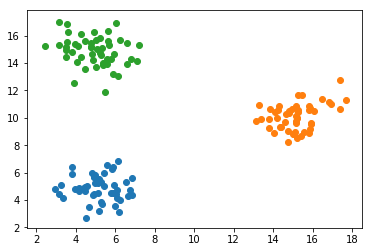

In [85]:
plot([data1, data2, data3])

simulation avec n_iterat = 100

In [86]:
n_iterat = 100

In [87]:
classes_inertia = []
classes_silhouette = []
classes_fonction = []
for _ in range(n_iterat):
    data1, data2, data3 = generer()
    data = data1+data2+data3
    
    _,val = calcInertia(data, K_max)
    classes_inertia.append(val) 
    
    _,val = calcSilhouette(data, K_max)
    classes_silhouette.append(val)
    
    _,val = calculFonction(data, K_max)
    classes_fonction.append(val)
    

affichage de l'histogramme du nombre de classes choisies

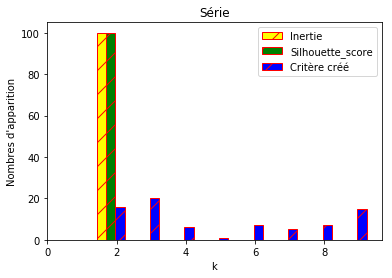

In [89]:
bins = [x + 0.33 for x in range(0, K_max)]
plt.hist([classes_inertia, classes_silhouette, classes_fonction], bins = bins, color = ['yellow', 'green', 'blue'],
            edgecolor = 'red', hatch = '/', label = ['Inertie', 'Silhouette_score','Critère créé'],
            histtype = 'bar') # bar est le defaut
plt.ylabel('Nombres d\'apparition')
plt.xlabel('k')
plt.title('Série')
plt.legend()